# Train a Semantic Segmentation Model for Water Detection

This notebook demonstrates how to train semantic segmentation models for water detection.

## Install packages

To use the new functionality, ensure the required packages are installed.

In [ ]:
%pip install geoai-py

## Import libraries

In [3]:
import geoai

## Download sample data

In [4]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [ ]:
out_folder = geoai.download_file(url)

## Train semantic segmentation model


In [ ]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and water
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

## Evaluate the model

Let's examine the training curves and model performance:

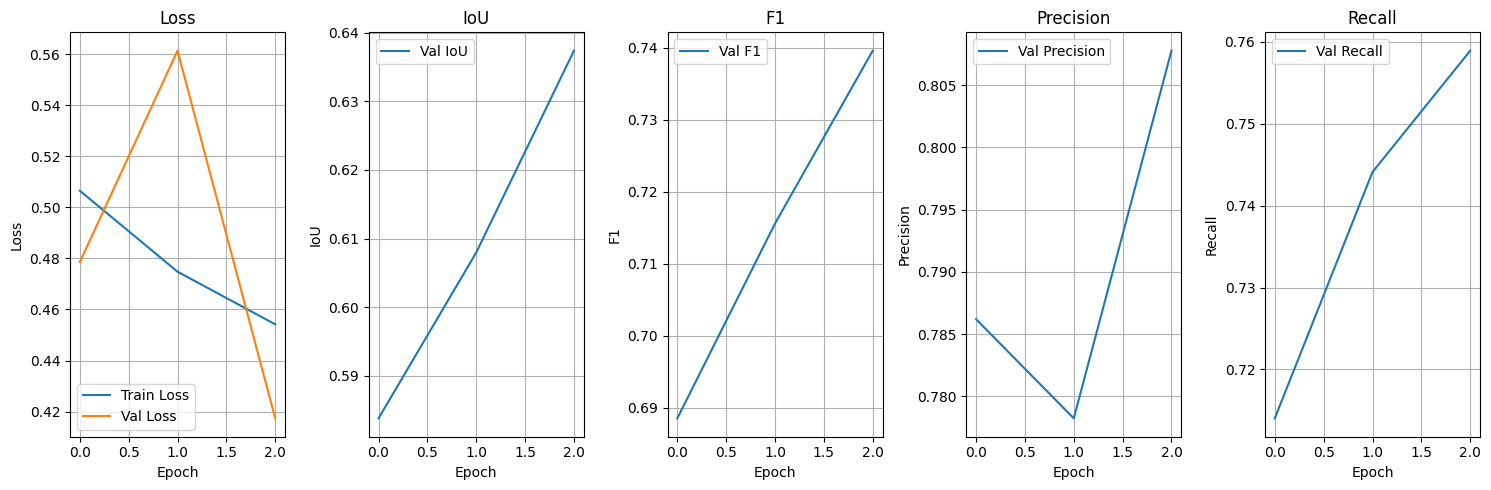


=== Performance Metrics Summary ===
IoU     - Best: 0.6374 | Final: 0.6374
F1      - Best: 0.7396 | Final: 0.7396
Precision - Best: 0.8078 | Final: 0.8078
Recall  - Best: 0.7589 | Final: 0.7589
Val Loss - Best: 0.4174 | Final: 0.4174



,epoch,train_loss,val_loss,val_iou,val_f1,val_precision,val_recall
0,1,0.506501,0.478547,0.583831,0.688522,0.786202,0.714025
1,2,0.474798,0.561305,0.607985,0.715597,0.778232,0.744116
2,3,0.454195,0.417391,0.637363,0.739618,0.807774,0.758933


In [7]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

## Run inference

You can run inference on a new image using the semantic_segmentation function. I don't have a new image to test on, so I'll use one of the training images. In reality, you would use your own images not used in training.

In [ ]:
#Uploaded your file
from google.colab import files
import os

# Uploaded file
uploaded = files.upload()

In [35]:
#Insert  your filename
test_image_path = "enisey.jpg"
#ground_truth_path = "enisey.jpg"
prediction_path = "enisey.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [ ]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

## Visualize the results

Plot saved to: enisey.png


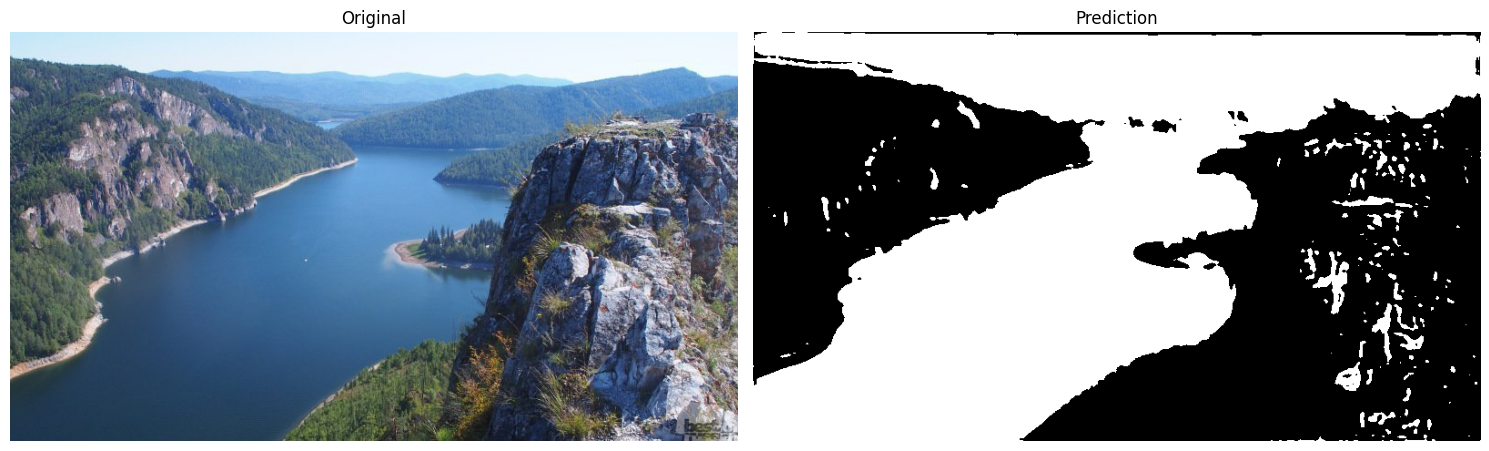

In [37]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    #ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path="enisey.png",
    show_plot=True,
)

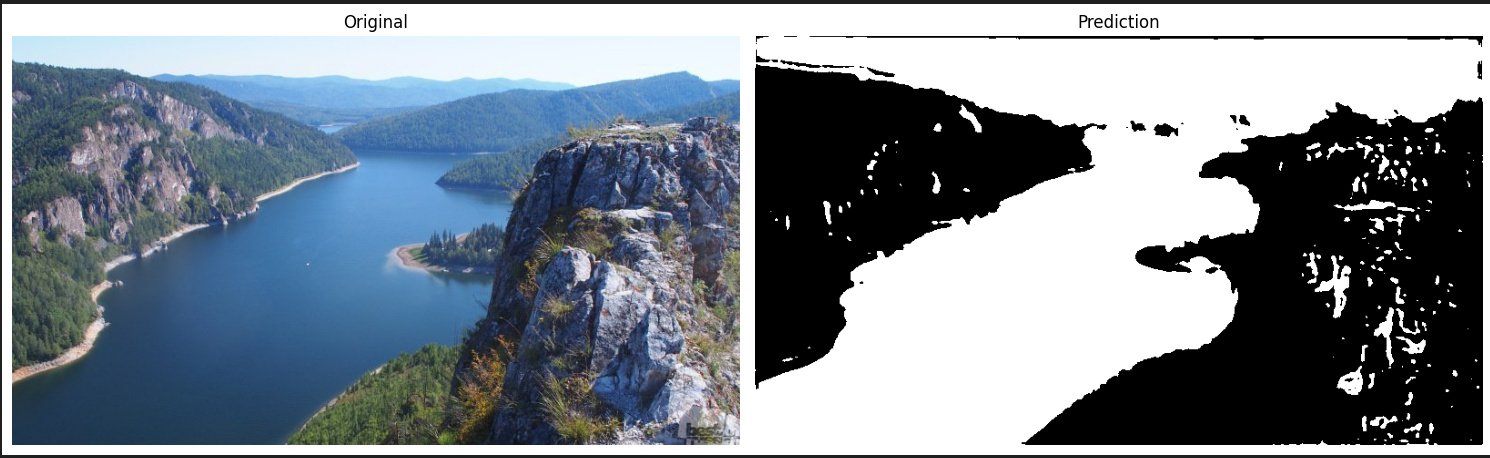